<a href="https://colab.research.google.com/github/rc-dbe/bigdatacertification/blob/master/Data_Analytics_Essentials_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Hands-on of Big Data Analyst with TuV Certified Qualification*


---




# 1. Data Analytics Essentials

**Overview:** 

* Data Exploration:
* Data Preparation:
* Dimensionality Reduction

## Data Exploration

Data exploration is the initial step in data analysis, where users explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest. This process isn’t meant to reveal every bit of information a dataset holds, but rather to help create a broad picture of important trends and major points to study in greater detail.

### Import Data

There are so many ways to import the data from the outside source. One of it is using Pandas, Pandas is a python library that widely used for data analytics.

In [0]:
# import library
import pandas as pd

In practice this time we will use Telco Customer Churn dataset that available at Kaggle. This dataset contains unique customer records for a telecom company called Telco.

This data set includes information about:
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
*   Demographic info about customers – gender, age range, and if they have partners and dependents.
*   Customers who left within the last month – the column is called Churn

We can import many types of file, from many types of source. Since we are using Goole Collab, we are going to import the dataset from an online link(GitHUb Repo). For the other methods to import data can be seen in the Pandas documentation. [HERE](https://https://pandas.pydata.org/pandas-docs/stable/). 



In [0]:
# Import Data From an online link (GitHub)
df_link = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/churn.csv', sep=';',)

In [0]:
# Select On of the dataset and show the data diemntion. 
df = df_link

In [4]:
# Prints the amount of rows and column numbers
df.shape

(7043, 21)

In [5]:
# Prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null int64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
# Prints 10 first Row
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,2985,2985.0,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,5695,18895.0,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,5385,10815.0,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),423,184075.0,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,707,15165.0,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,9965,8205.0,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),891,19494.0,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,2975,3019.0,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1048,304605.0,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),5615,348795.0,No


In [7]:
# Prints 5 last Row
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,848,19905.0,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1032,73629.0,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,296,34645.0,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,744,3066.0,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),10565,68445.0,No


### Descriptive Statistics

In [0]:
# Select Only Numeric Variable
df_num = df[['MonthlyCharges', 'tenure', 'TotalCharges']]

In [9]:
# Mean value
mean= df_num.mean()
mean

MonthlyCharges      3517.437456
tenure                32.371149
TotalCharges      126251.908419
dtype: float64

In [10]:
# Median value
median= df_num.median()
median

MonthlyCharges     1885.0
tenure               29.0
TotalCharges      36769.0
dtype: float64

In [11]:
# Mode value
mode= df_num.mode()
mode

,MonthlyCharges,tenure,TotalCharges
0,2005,1,202.0


In [12]:
# Prints descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,7043.0,3517.437456,3634.996251,19.0,647.5,1885.0,7015.0,11875.0
TotalCharges,7032.0,126251.908419,192523.026544,19.0,7562.0,36769.0,143010.0,867245.0


### Correlation

To find the pairwise correlation of all columns in the data frame we can use dataframe.corr() function from Pandas.  Any NA values are automatically excluded and 
any non-numeric data type columns in the data frame automatically  ignored. Read the documentation [HERE](https://https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

There are 4 methods available:
*  pearson: standard correlation coefficient
*  kendall: Kendall Tau correlation coefficient
*  spearman: Spearman rank correlation
*  callable: callable with input two 1d ndarrays

In [13]:
# Count the correlation among the columns using pearson method
correlation_matrix = df.corr(method='pearson')

# Print Correlation Matrix
correlation_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.112925,0.534780
MonthlyCharges,0.112925,1.000000,0.189156
TotalCharges,0.534780,0.189156,1.000000


### Contingency Table

In [14]:
# Compute Contingency Table
data_crosstab = pd.crosstab(df['PaymentMethod'], 
                            df['Churn'],  
                               margins = False) 
print(data_crosstab) 

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


### Data Visualization

In [0]:
# Import Library
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

We can customizing plots with style sheets. The style package adds support for easy-to-switch plotting “styles” with the same parameters as a matplotlibrc file.

There are a number of pre-defined styles provided by matplotlib, that can be seen [HERE](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

#### Visualize Data Distribution

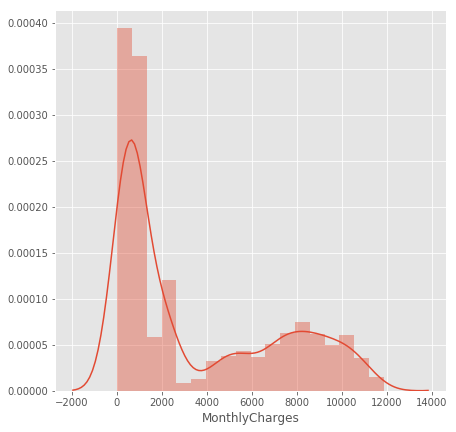

In [16]:
# Visualize Data Distribution
sns.distplot(df['MonthlyCharges'])

#### Scatter Plot

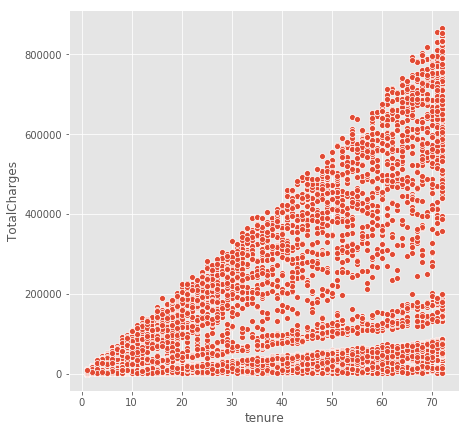

In [17]:
# Scatter Plot
sns.scatterplot(x="tenure", y="TotalCharges", data= df)

#### Bar Chart

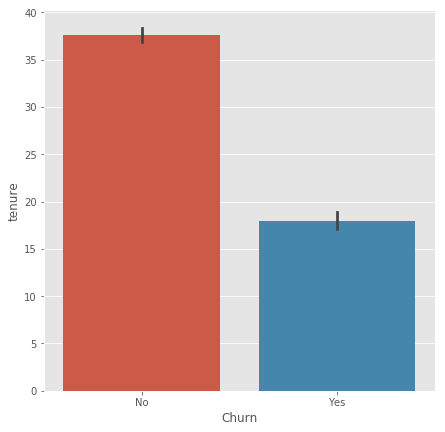

In [18]:
# Bar Chart
sns.barplot(x='Churn',y='tenure',data=df)

#### Pairwise Relationship

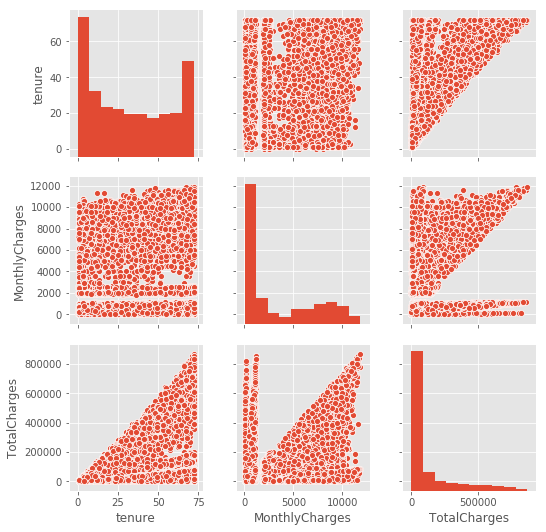

In [19]:
# Pairwise relationships
sns.pairplot(df)

## Data Preparation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis.

### Handling Missing Values

In [20]:
# Show missing values on data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
# Impute missing values with the median number
tc_median = df["TotalCharges"].median()
df["TotalCharges"].fillna(tc_median, inplace=True)

In [22]:
# Show the data information to see whether the empty value has been replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null int64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Encoding Categorical Variable

In [23]:
# Install Category Encoders
! pip install category_encoders

     |████████████████████████████████| 92kB 5.7MB/s 


In [24]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['gender', 
          'SeniorCitizen', 
          'Partner', 
          'Dependents', 
          'PhoneService', 
          'MultipleLines', 
          'InternetService', 
          'OnlineSecurity', 
          'OnlineBackup', 
          'DeviceProtection', 
          'TechSupport', 
          'StreamingTV', 
          'StreamingMovies', 
          'Contract', 
          'PaperlessBilling', 
          'PaymentMethod'])
df_binary = encoder.fit_transform(df)

df_binary.head()

,customerID,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2985,2985.0,No
1,5575-GNVDE,1,0,0,1,1,0,0,1,34,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,5695,18895.0,No
2,3668-QPYBK,1,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,5385,10815.0,Yes
3,7795-CFOCW,1,0,0,1,1,0,0,1,45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,423,184075.0,No
4,9237-HQITU,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,707,15165.0,Yes


In [25]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
customerID            7043 non-null object
gender_0              7043 non-null int64
gender_1              7043 non-null int64
SeniorCitizen_0       7043 non-null int64
SeniorCitizen_1       7043 non-null int64
Partner_0             7043 non-null int64
Partner_1             7043 non-null int64
Dependents_0          7043 non-null int64
Dependents_1          7043 non-null int64
tenure                7043 non-null int64
PhoneService_0        7043 non-null int64
PhoneService_1        7043 non-null int64
MultipleLines_0       7043 non-null int64
MultipleLines_1       7043 non-null int64
MultipleLines_2       7043 non-null int64
InternetService_0     7043 non-null int64
InternetService_1     7043 non-null int64
InternetService_2     7043 non-null int64
OnlineSecurity_0      7043 non-null int64
OnlineSecurity_1      7043 non-null int64
OnlineSecurity_2      7043 non-null int64
OnlineBack

In [26]:
df = df_binary.drop("customerID", axis=1)
df.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2985,2985.0,No
1,1,0,0,1,1,0,0,1,34,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,5695,18895.0,No
2,1,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,5385,10815.0,Yes
3,1,0,0,1,1,0,0,1,45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,423,184075.0,No
4,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,707,15165.0,Yes


### Normalization

Normalization typically means rescales the values into a range of [0,1]

In [32]:
column_names = df.columns.tolist()
column_names.remove('Churn')
column_names

['gender_0',
 'gender_1',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_0',
 'Partner_1',
 'Dependents_0',
 'Dependents_1',
 'tenure',
 'PhoneService_0',
 'PhoneService_1',
 'MultipleLines_0',
 'MultipleLines_1',
 'MultipleLines_2',
 'InternetService_0',
 'InternetService_1',
 'InternetService_2',
 'OnlineSecurity_0',
 'OnlineSecurity_1',
 'OnlineSecurity_2',
 'OnlineBackup_0',
 'OnlineBackup_1',
 'OnlineBackup_2',
 'DeviceProtection_0',
 'DeviceProtection_1',
 'DeviceProtection_2',
 'TechSupport_0',
 'TechSupport_1',
 'TechSupport_2',
 'StreamingTV_0',
 'StreamingTV_1',
 'StreamingTV_2',
 'StreamingMovies_0',
 'StreamingMovies_1',
 'StreamingMovies_2',
 'Contract_0',
 'Contract_1',
 'Contract_2',
 'PaperlessBilling_0',
 'PaperlessBilling_1',
 'PaymentMethod_0',
 'PaymentMethod_1',
 'PaymentMethod_2',
 'MonthlyCharges',
 'TotalCharges']

In [33]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()
df_norm = df.copy()

# Transform all attributes
df_norm[column_names] = mm_scaler.fit_transform(df_norm[column_names])
df_norm.sort_index(inplace=True)
df_norm.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420,No
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766,No
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449,Yes
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235,No
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465,Yes


### Standarization

Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [34]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initizalize Standard Scaler
standard_scaler = StandardScaler()
df_stand = df.copy()

# Transform all attributes
df_stand[column_names] = standard_scaler.fit_transform(df_stand[column_names])
df_stand.sort_index(inplace=True)
df_stand.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,-1.009559,1.009559,-0.439916,0.439916,-1.034530,1.034530,-0.654012,0.654012,-1.277445,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,-1.006696,0.633933,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.146486,-0.639983,No
1,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.066327,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,-1.116820,0.599097,-0.557287,No
2,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,1.109785,-1.116820,0.513809,-0.599284,Yes
3,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.514251,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,0.986321,-1.563872,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,0.895399,-0.851351,0.301276,No
4,-1.009559,1.009559,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,0.723740,-1.129102,0.0,-1.006696,0.633933,0.0,0.725563,-1.131709,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.773216,-0.576674,Yes


## Dimensionality Reduction

### Principal Component Analysis

In [35]:
# Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_breast_cancer 
  
# instantiating 
cancer = load_breast_cancer() 
  
# creating dataframe 
df_pca = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
  
# checking head of dataframe 
df_pca.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler() 

# fitting 
scalar.fit(df_pca) 
scaled_data = scalar.transform(df_pca) 

# Importing PCA 
from sklearn.decomposition import PCA 

# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 

x_pca.shape 


(569, 2)

Text(0, 0.5, 'Second Principal Component')

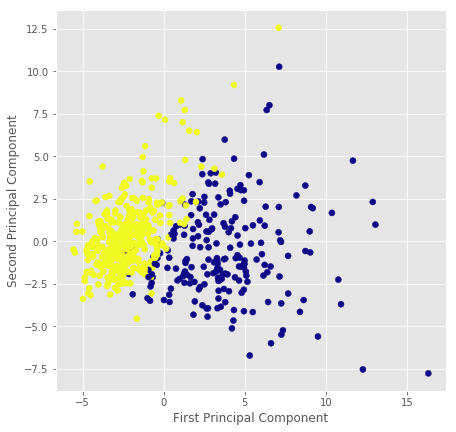

In [37]:
# Plot 

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma') 

# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 


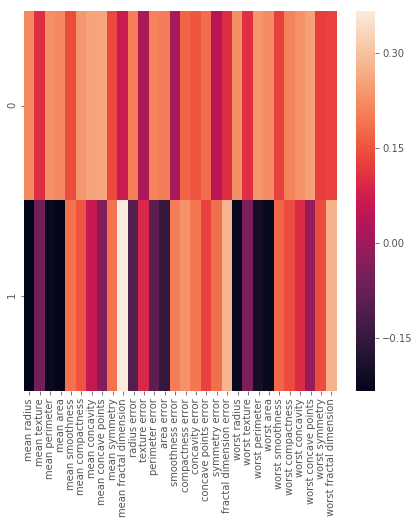

In [41]:
# plotting heatmap
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names']) 
sns.heatmap(df_comp) 